# ROI Analysis

Conceptual overview ["Poldrack RA. Region of interest analysis for fMRI. Soc Cogn Affect Neurosci. 2007 Mar;2(1):67-70. doi: 10.1093/scan/nsm006. PMID: 18985121; PMCID: PMC2555436."](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2555436/)

# Nilearn - computing an ROI mask manually

Below is the from [this tutorial](https://nilearn.github.io/stable/auto_examples/06_manipulating_images/plot_roi_extraction.html)

In [1]:
from nilearn.maskers import NiftiMasker

In [2]:
# cut in x-direction
sagittal = -25
# cut in y-direction
coronal = -37
# cut in z-direction
axial = -6

# coordinates displaying should be prepared as a list
cut_coords = [sagittal, coronal, axial]

In [3]:
# We load data from nilearn by import datasets
from nilearn import datasets

# First, we fetch single subject specific data with haxby datasets: to have
# anatomical image, EPI images and masks images
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print(
    "First subject anatomical nifti image (3D) located is "
    f"at: {haxby_dataset.anat[0]}"
)
print(
    "First subject functional nifti image (4D) is located "
    f"at: {haxby_dataset.func[0]}"
)
print(
    "Labels of haxby dataset (text file) is located "
    f"at: {haxby_dataset.session_target[0]}"
)

# Second, load the labels stored in a text file into array using pandas
import pandas as pd

session_target = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
# Now, we have the labels and will be useful while computing student's t-test
haxby_labels = session_target["labels"]


Dataset created in /Users/zenkavi/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 290562048 of 291168628 bytes (99.8%,    1.1s remaining) ...done. (504 seconds, 8 min)
Extracting data from /Users/zenkavi/nilearn_data/haxby2001/def37a305edfda829916fa14c9ea08f8/subj2-2010.01.14.tar.gz...

First subject anatomical nifti image (3D) located is at: /Users/zenkavi/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is located at: /Users/zenkavi/nilearn_data/haxby2001/subj2/bold.nii.gz
Labels of haxby dataset (text file) is located at: /Users/zenkavi/nilearn_data/haxby2001/subj2/labels.txt


.. done.


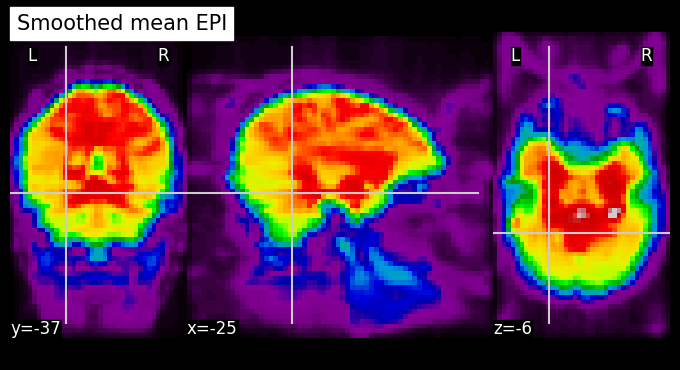

In [4]:
# Smooth the data using image processing module from nilearn
from nilearn import image

# Functional data
fmri_filename = haxby_dataset.func[0]
# smoothing: first argument as functional data filename and smoothing value
# (integer) in second argument. Output returns in Nifti image.
fmri_img = image.smooth_img(fmri_filename, fwhm=6)

# Visualize the mean of the smoothed EPI image using plotting function
# `plot_epi`
from nilearn.plotting import plot_epi

# First, compute the voxel-wise mean of smooth EPI image (first argument) using
# image processing module `image`
mean_img = image.mean_img(fmri_img)
# Second, we visualize the mean image with coordinates positioned manually
plot_epi(mean_img, title="Smoothed mean EPI", cut_coords=cut_coords)

In [5]:
from nilearn.image import get_data

fmri_data = get_data(fmri_img)
# number of voxels being x*y*z, samples in 4th dimension
fmri_data.shape

(40, 64, 64, 1452)

What is the structure of `fmri_data`?

In [11]:
fmri_data

array([[[[3.82783949e-01, 3.15722167e-01, 1.93227097e-01, ...,
          8.88536274e-01, 1.79597533e+00, 9.63508844e-01],
         [4.48387653e-01, 3.57153237e-01, 2.62456715e-01, ...,
          3.60178852e+00, 6.74118948e+00, 3.68342948e+00],
         [3.93492043e-01, 3.94156963e-01, 3.09761494e-01, ...,
          5.81759548e+00, 9.12431622e+00, 5.42240191e+00],
         ...,
         [5.35980606e+00, 3.80976176e+00, 4.74490786e+00, ...,
          3.10985953e-01, 3.99323791e-01, 4.01381314e-01],
         [2.98107243e+00, 2.08783507e+00, 1.77438378e+00, ...,
          1.66237265e-01, 2.97099471e-01, 2.51354843e-01],
         [6.65085733e-01, 4.57098573e-01, 2.93900251e-01, ...,
          3.76221165e-02, 1.17603317e-01, 6.04814105e-02]],

        [[1.31131351e+00, 1.08614349e+00, 7.85015523e-01, ...,
          7.95306444e-01, 1.51361012e+00, 1.36506402e+00],
         [1.50369680e+00, 1.22958148e+00, 1.05018675e+00, ...,
          3.34878469e+00, 5.61668968e+00, 4.88832569e+00],
        

What is the structure of `haxby_labels`?  

Notice it has the same number of rows as the 4th dimension of `fmri_data`. These are the conditions in each TR.

In [8]:
haxby_labels

0       rest
1       rest
2       rest
3       rest
4       rest
        ... 
1447    rest
1448    rest
1449    rest
1450    rest
1451    rest
Name: labels, Length: 1452, dtype: object

In [9]:
import numpy as np

np.unique(haxby_labels)

array(['bottle', 'cat', 'chair', 'face', 'house', 'rest', 'scissors',
       'scrambledpix', 'shoe'], dtype=object)

In [10]:
haxby_labels == 'face'

0       False
1       False
2       False
3       False
4       False
        ...  
1447    False
1448    False
1449    False
1450    False
1451    False
Name: labels, Length: 1452, dtype: bool

To get the TR's (in the 4th column) where the condition was `face` filter `fmri_data` by the indices where `haxby_labels` is `face`.

In [12]:
fmri_data[..., haxby_labels == "face"]

array([[[[ 0.249294  ,  0.23908046,  0.22750494, ...,  1.0444759 ,
           1.5547976 ,  1.4048415 ],
         [ 0.36848742,  0.36405116,  0.2626484 , ...,  4.079679  ,
           6.062603  ,  5.086544  ],
         [ 0.38807136,  0.4986926 ,  0.29724556, ...,  6.0205965 ,
           8.205663  ,  6.265127  ],
         ...,
         [ 4.8121395 ,  4.722317  ,  4.7552476 , ...,  0.33671847,
           0.17260528,  0.38363338],
         [ 1.8278258 ,  2.6381319 ,  2.0118592 , ...,  0.19990312,
           0.16966033,  0.21935472],
         [ 0.34474072,  0.61825615,  0.3867336 , ...,  0.08474425,
           0.08902448,  0.08891624]],

        [[ 0.9114911 ,  0.8340659 ,  0.86384505, ...,  1.1001885 ,
           1.3172127 ,  1.8039609 ],
         [ 1.3003798 ,  1.2654822 ,  0.9663606 , ...,  4.197411  ,
           5.13205   ,  6.552556  ],
         [ 1.3763375 ,  1.7548878 ,  1.0929116 , ...,  5.862411  ,
           7.013413  ,  7.6071086 ],
         ...,
         [ 4.8144054 ,  3.9113033 

Now there are 108 TRs in this condition.

In [13]:
fmri_data[..., haxby_labels == "face"].shape

(40, 64, 64, 108)

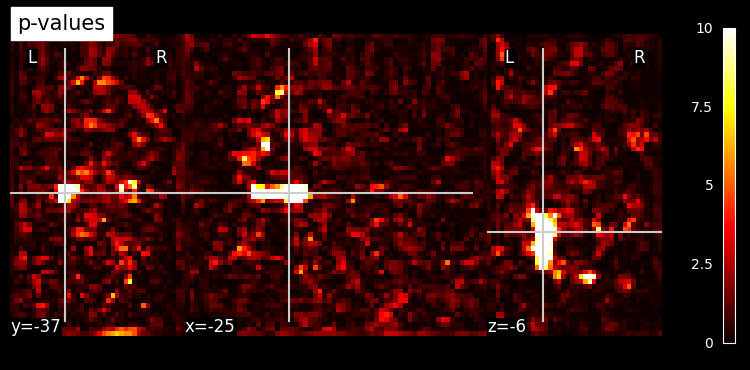

In [14]:
import numpy as np
from scipy import stats

# This test returns p-values that represent probabilities that the two
# time-series were not drawn from the same distribution. The lower the
# p-value, the more discriminative is the voxel in distinguishing the two
# conditions (faces and houses).
_, p_values = stats.ttest_ind(
    fmri_data[..., haxby_labels == "face"],
    fmri_data[..., haxby_labels == "house"],
    axis=-1,
)

# Use a log scale for p-values
log_p_values = -np.log10(p_values)
# NAN values to zero
log_p_values[np.isnan(log_p_values)] = 0.0
log_p_values[log_p_values > 10.0] = 10.0

# Before visualizing, we transform the computed p-values to Nifti-like image
# using function `new_img_like` from nilearn.
from nilearn.image import new_img_like

# Visualize statistical p-values using plotting function `plot_stat_map`
from nilearn.plotting import plot_stat_map

# First argument being a reference image
# and second argument should be p-values data
# to convert to a new image as output.
# This new image will have same header information as reference image.
log_p_values_img = new_img_like(fmri_img, log_p_values)

# Now, we visualize log p-values image on functional mean image as background
# with coordinates given manually and colorbar on the right side of plot (by
# default colorbar=True)
plot_stat_map(
    log_p_values_img, mean_img, title="p-values", cut_coords=cut_coords
)

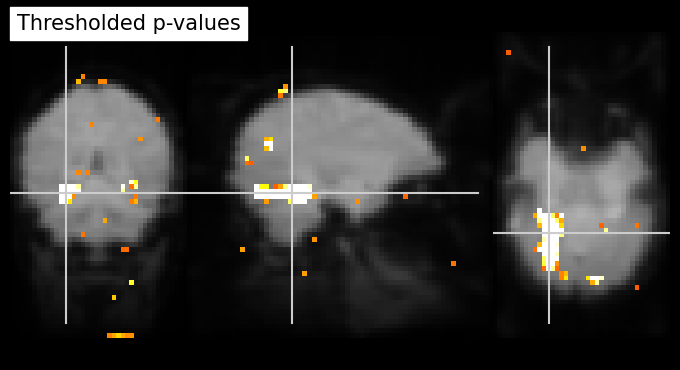

In [15]:
# Note that we use log p-values data; we force values below 5 to 0 by
# thresholding.
log_p_values[log_p_values < 5] = 0

# Visualize the reduced voxels of interest using statistical image plotting
# function. As shown above, we first transform data in array to Nifti image.
log_p_values_img = new_img_like(fmri_img, log_p_values)

# Now, visualizing the created log p-values to image without colorbar and
# without Left - 'L', Right - 'R' annotation
plot_stat_map(
    log_p_values_img,
    mean_img,
    title="Thresholded p-values",
    annotate=False,
    colorbar=False,
    cut_coords=cut_coords,
)

/var/folders/b1/562kvth14gx1lc4r0w65fc0m0000gn/T/ipykernel_79766/2663323348.py:25: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  bin_p_values_and_vt_img = new_img_like(


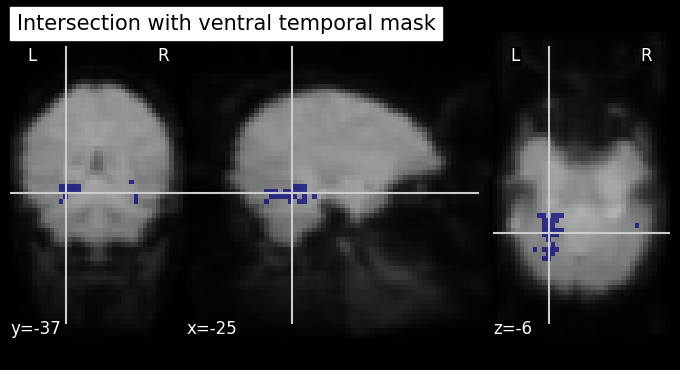

In [18]:
# self-computed mask
bin_p_values = log_p_values != 0
# VT mask
mask_vt_filename = haxby_dataset.mask_vt[0]

# The first step is to load VT mask and same time convert data type
# numbers to boolean type
from nilearn.image import load_img

vt = get_data(load_img(mask_vt_filename)).astype(bool)

# We can then use a logical "and" operation - numpy.logical_and - to keep only
# voxels that have been selected in both masks. In neuroimaging jargon, this
# is called an "AND conjunction". We use already imported numpy as np
bin_p_values_and_vt = np.logical_and(bin_p_values, vt)

# Visualizing the mask intersection results using plotting function `plot_roi`,
# a function which can be used for visualizing target specific voxels.
from nilearn.plotting import plot_roi, show

# First, we create new image type of binarized and intersected mask (second
# argument) and use this created Nifti image type in visualization. Binarized
# values in data type boolean should be converted to int data type at the same
# time. Otherwise, an error will be raised
bin_p_values_and_vt_img = new_img_like(
    fmri_img, bin_p_values_and_vt.astype(int)
)
# Visualizing goes here with background as computed mean of functional images
plot_roi(
    bin_p_values_and_vt_img,
    mean_img,
    cut_coords=cut_coords,
    title="Intersection with ventral temporal mask",
)

/var/folders/b1/562kvth14gx1lc4r0w65fc0m0000gn/T/ipykernel_79766/3856120610.py:11: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  dil_bin_p_values_and_vt_img = new_img_like(


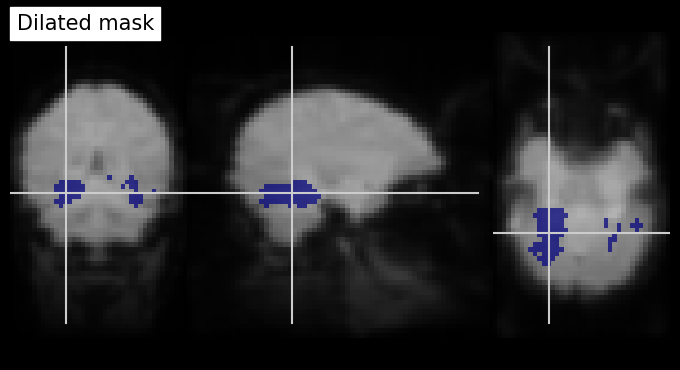

In [19]:
# We use ndimage function from scipy Python library for mask dilation
from scipy.ndimage import binary_dilation

# Input here is a binarized and intersected mask data from previous section
dil_bin_p_values_and_vt = binary_dilation(bin_p_values_and_vt)

# Now, we visualize the same using `plot_roi` with data being converted
# to Nifti image.
# In all new image like, reference image is the same but second argument
# varies with data specific
dil_bin_p_values_and_vt_img = new_img_like(
    fmri_img, dil_bin_p_values_and_vt.astype(int)
)
# Visualization goes here without 'L', 'R' annotation and coordinates being the
# same
plot_roi(
    dil_bin_p_values_and_vt_img,
    mean_img,
    title="Dilated mask",
    cut_coords=cut_coords,
    annotate=False,
)

In [20]:
from scipy.ndimage import label

labels, _ = label(dil_bin_p_values_and_vt)

In [22]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

The 5th and the 3rd are the labels we are interested in but you can visualize the other labels as well to confirm that they are smaller clusters of connected dilated voxels.

/var/folders/b1/562kvth14gx1lc4r0w65fc0m0000gn/T/ipykernel_79766/1829276495.py:7: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  first_roi_img = new_img_like(fmri_img, first_roi_data)
/var/folders/b1/562kvth14gx1lc4r0w65fc0m0000gn/T/ipykernel_79766/1829276495.py:13: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  second_roi_img = new_img_like(fmri_img, second_roi_data)


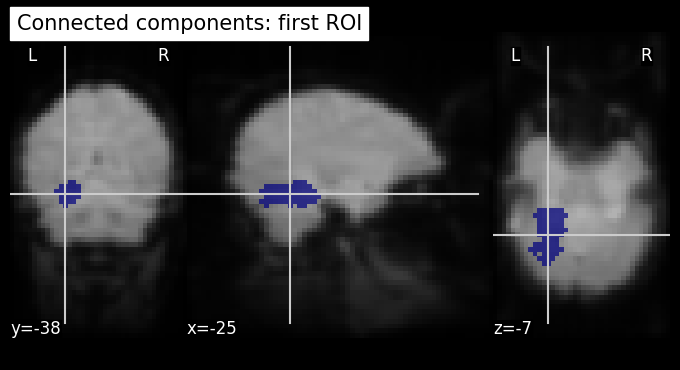

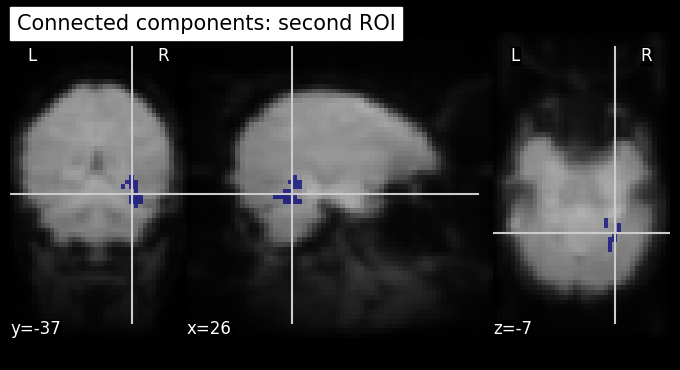

In [26]:

# we take first roi data with labels assigned as integer 1
first_roi_data = (labels == 5).astype(int)
# Similarly, second roi data is assigned as integer 2
second_roi_data = (labels == 3).astype(int)
# Visualizing the connected components
# First, we create a Nifti image type from first roi data in a array
first_roi_img = new_img_like(fmri_img, first_roi_data)
# Then, visualize the same created Nifti image in first argument and mean of
# functional images as background (second argument), cut_coords is default now
# and coordinates are selected automatically pointed exactly on the roi data
plot_roi(first_roi_img, mean_img, title="Connected components: first ROI")
# we do the same for second roi data
second_roi_img = new_img_like(fmri_img, second_roi_data)
# Visualization goes here with second roi image and cut_coords are default with
# coordinates selected automatically pointed on the data
plot_roi(second_roi_img, mean_img, title="Connected components: second ROI")

In [27]:
# We extract data from ROIs using nilearn's NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker

# Before data extraction, we convert an array labels to Nifti like image. All
# inputs to NiftiLabelsMasker must be Nifti-like images or filename to Nifti
# images. We use the same reference image as used above in previous sections
labels_img = new_img_like(fmri_img, labels)

# First, initialize masker with parameters suited for data extraction using
# labels as input image, resampling_target is None as affine,
# shape/size is same
# for all the data used here, time series signal processing parameters
# standardize and detrend are set to False
masker = NiftiLabelsMasker(
    labels_img, resampling_target=None, standardize=False, detrend=False
)
# After initialization of masker object, we call fit() for preparing labels_img
# data according to given parameters
masker.fit()

NiftiLabelsMasker(labels_img=<nibabel.nifti1.Nifti1Image object at 0x290da75b0>,
                  resampling_target=None)

In [28]:
# Preparing for data extraction: setting number of conditions, size, etc from
# haxby dataset
condition_names = haxby_labels.unique()
n_cond_img = fmri_data[..., haxby_labels == "house"].shape[-1] # this is the same for all conditions
n_conds = len(condition_names)

In [37]:
fmri_data[..., haxby_labels == "house"][..., :108].shape

(40, 64, 64, 108)

In [38]:
fmri_data[..., haxby_labels == "house"].shape

(40, 64, 64, 108)

In [39]:
X1, X2 = np.zeros((n_cond_img, n_conds)), np.zeros((n_cond_img, n_conds))
# Gathering data for each condition and then use transformer from masker
# object transform() on each data. The transformer extracts data in condition
# maps where the target regions are specified by labels images
for i, cond in enumerate(condition_names):
    cond_maps = new_img_like(
        fmri_img, fmri_data[..., haxby_labels == cond][..., :n_cond_img]
    )
    mask_data = masker.transform(cond_maps) # use the masker to extract the data for each ROI
    X1[:, i], X2[:, i] = mask_data[:, 0], mask_data[:, 1]
condition_names[np.where(condition_names == "scrambledpix")] = "scrambled"

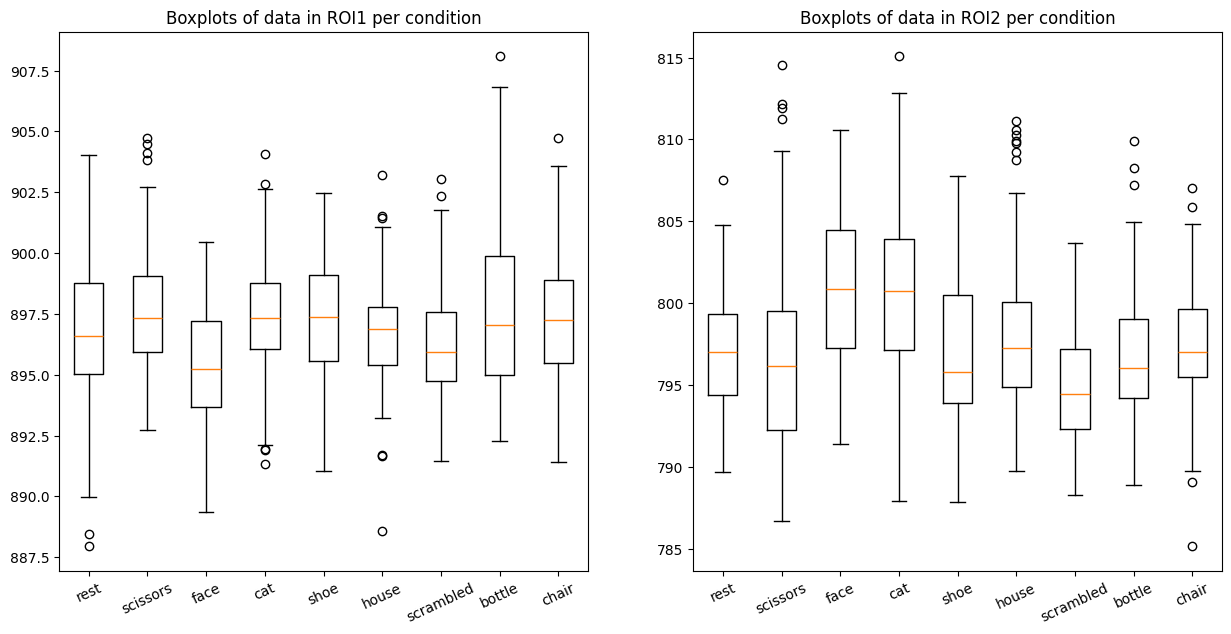

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
for i in np.arange(2):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(X1 if i == 0 else X2)
    plt.xticks(
        np.arange(len(condition_names)) + 1, condition_names, rotation=25
    )
    plt.title(f"Boxplots of data in ROI{int(i + 1)} per condition")


Another useful tutorial [ROI-based decoding](https://nilearn.github.io/stable/auto_examples/02_decoding/plot_haxby_full_analysis.html).  

A newer tool to play around with data interactively [fRAT](https://github.com/elliohow/fMRI_ROI_Analysis_Tool).

# Nilearn - create spherical mask

Take from [this tutorial](https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_sphere_based_connectome.html).

In [41]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    "Posterior Cingulate Cortex",
    "Left Temporoparietal junction",
    "Right Temporoparietal junction",
    "Medial prefrontal cortex",
]

In [42]:
from nilearn.maskers import NiftiSpheresMasker

masker = NiftiSpheresMasker(
    dmn_coords,
    radius=8,
    detrend=True,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    low_pass=0.1,
    high_pass=0.01,
    t_r=2,
    memory="nilearn_cache",
    memory_level=1,
    verbose=2,
    clean__butterworth__padtype="even",  # kwarg to modify Butterworth filter
)

In [44]:
masker.fit()

spherical_masker_img = masker.transform(fmri_img)

________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x1085b3a30>, <nilearn.maskers.nifti_spheres_masker._ExtractionFunctor object at 0x2951868f0>, { 'allow_overlap': False,
  'clean_kwargs': {'butterworth__padtype': 'even'},
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': 2}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=2)
[NiftiSpheresMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [  

/Users/zenkavi/.pyenv/versions/3.10.4/envs/py-fmribook/lib/python3.10/site-packages/nilearn/maskers/nifti_spheres_masker.py:455: UserWarning: Persisting input arguments took 2.66s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  signals, _ = self._cache(


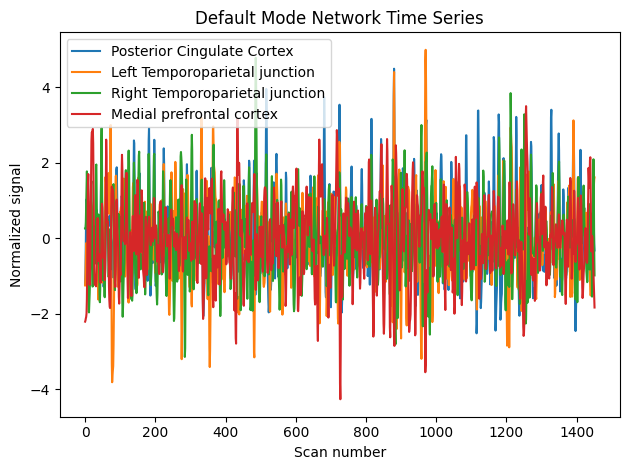

In [47]:

# Visualizing goes here with background as computed mean of functional images
import matplotlib.pyplot as plt

for time_serie, label in zip(spherical_masker_img.T, labels):
    plt.plot(time_serie, label=label)

plt.title("Default Mode Network Time Series")
plt.xlabel("Scan number")
plt.ylabel("Normalized signal")
plt.legend()
plt.tight_layout()

# Neurosynth - functional ROI

Based on [this tutorial](https://lukas-snoek.com/NI-edu/fMRI-introduction/week_6/ROI_analysis.html#functional-rois-neurosynth)

Do a meta-analysis using a term (e.g. "reward") and download the generated map. You can then binarize it as shown above.

![Neurosynth functional ROI](./images/Neurosynth_funcROI.png "Neurosynth functional ROI")
